In [3]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap
import os
from scipy.stats import gaussian_kde
import matplotlib.ticker as mticker
import cartopy

In [5]:
cartopy_data_dir = r"G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\cartopy"
cartopy.config['data_dir'] = cartopy_data_dir

# Verificar que la carpeta exista
if not os.path.exists(cartopy_data_dir):
    raise FileNotFoundError(f"La carpeta {cartopy_data_dir} no existe. Verifica la ruta.")

# Opcional: Forzar a Cartopy a buscar los datos en tu ruta personalizada
cartopy.config['pre_existing_data_dir'] = cartopy_data_dir

Variables disponibles en el .npz: ['centros_lat', 'centros_lon', 'medias', 'medianas', 'desviaciones', 'varianzas', 'sesgos', 'curtosis', 'conteos']


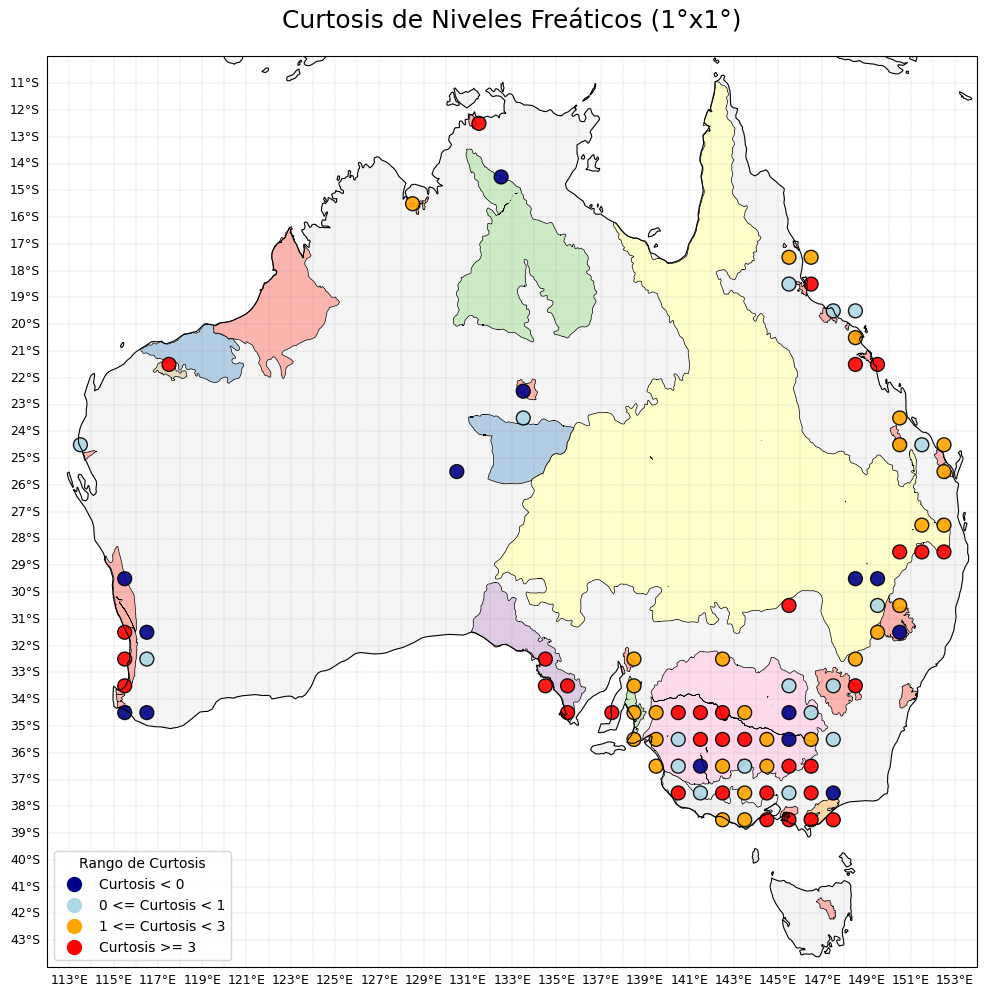

In [7]:
# Función para visualizar los puntos con curtosis
def vis_pozos_curtosis(shp_path, npz_path, output_path):
    # Cargar archivo npz
    data = np.load(npz_path)

    # Verifica qué variables contiene el archivo
    print("Variables disponibles en el .npz:", data.files)

    # Asignar las variables desde el archivo .npz (ajusta si los nombres difieren)
    curtosis    = data['curtosis']
    centros_lon = data['centros_lat']  #los valores aquí están invertidos
    centros_lat = data['centros_lon']

    # Leer shapefile de cuencas o acuíferos
    mapa = gpd.read_file(shp_path).to_crs(epsg=4326)
    cuencas_unificadas = mapa.dissolve(by='Broader')

    # Crear colores únicos por región
    unique_regions = cuencas_unificadas.index.unique()
    cmap = plt.get_cmap('Pastel1')
    region_colors = {region: cmap(i % cmap.N) for i, region in enumerate(unique_regions)}

    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([112, 154, -44, -10], crs=ccrs.PlateCarree())

    # Añadir elementos base
    ax.add_feature(cfeature.LAND, facecolor='whitesmoke')
    ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)

    # Dibujar cuencas con color
    for region in cuencas_unificadas.index:
        cuencas_unificadas.loc[[region]].plot(
            ax=ax,
            color=region_colors[region],
            edgecolor='black',
            linewidth=0.5,
            transform=ccrs.PlateCarree()
        )

    # Clasificar valores de curtosis y asignar colores
    colors = np.select(
        [curtosis < 0, (curtosis >= 0) & (curtosis < 1), (curtosis >= 1) & (curtosis < 3), curtosis >= 3],
        ['darkblue', 'lightblue', 'orange', 'red'],
        default='gray'
    )

    # Graficar los puntos
    ax.scatter(centros_lon, centros_lat, c=colors, s=100, alpha=0.9, edgecolors='black', transform=ccrs.PlateCarree())

    # Título y grilla
    ax.set_title('Curtosis de Niveles Freáticos (1°x1°)', fontsize=18, pad=20)
    gl = ax.gridlines(draw_labels=True, linewidth=0.2, color='gray', alpha=0.7, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 9}
    gl.ylabel_style = {'size': 9}
    gl.xlocator = mticker.FixedLocator(np.arange(112, 155, 1))
    gl.ylocator = mticker.FixedLocator(np.arange(-44, -9, 1))

    # Leyenda manual
    custom_legend = [
        Line2D([0], [0], color='darkblue', marker='o', linestyle='None', markersize=10, label='Curtosis < 0'),
        Line2D([0], [0], color='lightblue', marker='o', linestyle='None', markersize=10, label='0 <= Curtosis < 1'),
        Line2D([0], [0], color='orange', marker='o', linestyle='None', markersize=10, label='1 <= Curtosis < 3'),
        Line2D([0], [0], color='red', marker='o', linestyle='None', markersize=10, label='Curtosis >= 3'),
    ]
    ax.legend(handles=custom_legend, loc='lower left', fontsize=10, title="Rango de Curtosis")   

    # Guardar imagen
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.show()


# ==== Llama a la función con tus archivos ====
shapefile_path = r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\ARTÍCULO\australia_aquifers.shp'
npz_path = r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\_01_imagenes\histogramas\estadisticas_grilla1.npz'
output_path = r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\_01_imagenes\mapas\mapa_curtosis1.png'

vis_pozos_curtosis(shapefile_path, npz_path, output_path)

Variables disponibles en el .npz: ['centros_lat', 'centros_lon', 'medias', 'medianas', 'desviaciones', 'varianzas', 'sesgos', 'curtosis', 'conteos']


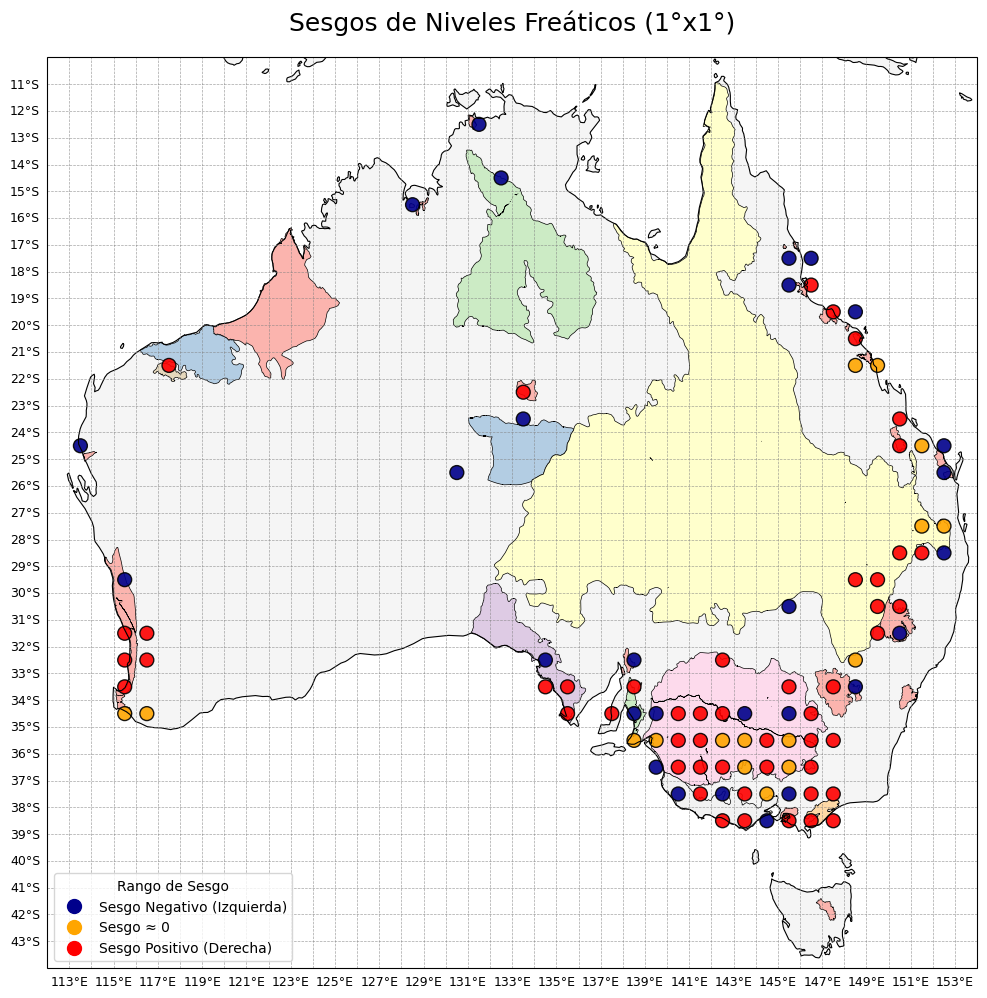

In [8]:
# Función para visualizar los puntos con curtosis
def vis_pozos_sesgo(shp_path, npz_path, output_path):
    # Cargar archivo npz
    data = np.load(npz_path)

    # Verifica qué variables contiene el archivo
    print("Variables disponibles en el .npz:", data.files)

    # Asignar las variables desde el archivo .npz (ajusta si los nombres difieren)
    sesgos      = data['sesgos']
    centros_lon = data['centros_lat']
    centros_lat = data['centros_lon']

    # Leer shapefile de cuencas o acuíferos
    mapa = gpd.read_file(shp_path).to_crs(epsg=4326)
    cuencas_unificadas = mapa.dissolve(by='Broader')

    # Crear colores únicos por región
    unique_regions = cuencas_unificadas.index.unique()
    cmap = plt.get_cmap('Pastel1')
    region_colors = {region: cmap(i % cmap.N) for i, region in enumerate(unique_regions)}

    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([112, 154, -44, -10], crs=ccrs.PlateCarree())

    # Añadir elementos base
    ax.add_feature(cfeature.LAND, facecolor='whitesmoke')
    ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)

    # Dibujar cuencas con color
    for region in cuencas_unificadas.index:
        cuencas_unificadas.loc[[region]].plot(
            ax=ax,
            color=region_colors[region],
            edgecolor='black',
            linewidth=0.5,
            transform=ccrs.PlateCarree()
        )

    # Clasificar valores de curtosis y asignar colores
    colors = np.select(
    [sesgos < 0, np.isclose(sesgos, 0, atol=0.3), sesgos > 0.3],
    ['darkblue', 'orange', 'red'],
    default='gray'
    )
    # Graficar los puntos
    ax.scatter(centros_lon, centros_lat, c=colors, s=100, alpha=0.9, edgecolors='black', transform=ccrs.PlateCarree())

    # Título y grilla
    ax.set_title('Sesgos de Niveles Freáticos (1°x1°)', fontsize=18, pad=20)
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.7, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 9}
    gl.ylabel_style = {'size': 9}
    gl.xlocator = mticker.FixedLocator(np.arange(112, 155, 1))
    gl.ylocator = mticker.FixedLocator(np.arange(-44, -9, 1))

    # Leyenda manual
    custom_legend = [
    Line2D([0], [0], color='darkblue', marker='o', linestyle='None', markersize=10, label='Sesgo Negativo (Izquierda)'),
    Line2D([0], [0], color='orange', marker='o', linestyle='None', markersize=10, label='Sesgo ≈ 0'),
    Line2D([0], [0], color='red', marker='o', linestyle='None', markersize=10, label='Sesgo Positivo (Derecha)'),
    ]
    ax.legend(handles=custom_legend, loc='lower left', fontsize=10, title="Rango de Sesgo")

    # Guardar imagen
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.show()


# ==== Llama a la función con tus archivos ====
shapefile_path = r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\ARTÍCULO\australia_aquifers.shp'
npz_path = r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\_01_imagenes\histogramas\estadisticas_grilla1.npz'
output_path = r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\_01_imagenes\mapas\mapa_sesgos1.png'

vis_pozos_sesgo(shapefile_path, npz_path, output_path)